<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Sommaire
        </h1>
    </div>
</div>

- **[Preparation du dataset](#pre)**

- **[Verification des annotations](#ve)**

- **[Yolo v5 entrainement](#en)**

- **[Resultat](#re)**

- **[Test du modele](#te)**


https://github.com/ismailazdad/vision_detection_benchmark


In [1]:
from google.colab import drive
drive.mount('/content/ShardDrives/', force_remount=True)

Mounted at /content/ShardDrives/


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw

In [3]:
!rm -rf /content/bloods

In [ ]:
!unzip /content/ShardDrives/MyDrive/bloods/blood_dataset_yolo.zip -d /content/

<a name='pre'></a>
<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Preparation du datatset
        </h1>
    </div>
</div>

In [5]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 13124, done.
remote: Total 13124 (delta 0), reused 0 (delta 0), pack-reused 13124
Receiving objects: 100% (13124/13124), 11.99 MiB | 3.61 MiB/s, done.
Resolving deltas: 100% (9126/9126), done.


In [6]:
!cp -avr /content/ShardDrives/MyDrive/bloods/blood.yaml /content/yolov5/data/blood.yaml

'/content/ShardDrives/MyDrive/bloods/blood.yaml' -> '/content/yolov5/data/blood.yaml'


In [7]:
!cp -avr /content/ShardDrives/MyDrive/bloods/yolov5l.yaml /content/yolov5/models/yolov5l.yaml

'/content/ShardDrives/MyDrive/bloods/yolov5l.yaml' -> '/content/yolov5/models/yolov5l.yaml'


In [ ]:
# !cp -avr /content/ShardDrives/MyDrive/dogs/yolov5l.yaml /content/yolov5/models/yolov5l.yaml

'/content/ShardDrives/MyDrive/dogs/yolov5l.yaml' -> '/content/yolov5/models/yolov5l.yaml'


In [8]:
cd /content/yolov5

/content/yolov5


In [9]:
pwd

'/content/yolov5'

In [1]:
lymp_list = ['basophil','erythroblast','lymphocyte','neutrophil','eosinophil','monocyte']
class_name_to_id_mapping = {}
for i, elem in enumerate(lymp_list):
    class_name_to_id_mapping[elem] = i
print(class_name_to_id_mapping)

{'basophil': 0, 'erythroblast': 1, 'lymphocyte': 2, 'neutrophil': 3, 'eosinophil': 4, 'monocyte': 5}


In [29]:
cd ..

/media/ismail/Elements/formation/projet7


In [39]:
pwd

'/media/ismail/Elements/formation/projet7'

In [15]:
cd feux/RoadSignDetectionDataset/

/media/ismail/Elements/formation/projet7/feux/RoadSignDetectionDataset


In [ ]:
annotations = [os.path.join('/media/ismail/Elements/formation/projet7/bloodcells/blood_dataset/labels', x) for x in os.listdir('/media/ismail/Elements/formation/projet7//bloodcells/blood_dataset/labels') if x[-3:] == "txt"]
annotations

In [59]:
import os
import sys
annotation_list = []
# directory = os.path.dirname(os.path.realpath(sys.argv[0])) #get the directory of your script
for subdir, dirs, files in os.walk('/media/ismail/Elements/formation/projet7/bloodcells/blood_dataset/labels'):
    for filename in files:
        subdirectoryPath = os.path.relpath(subdir, 'labels') #get the path to your subdirectory
        filePath = os.path.join(subdirectoryPath, filename) #get the path to your file
#         annotations.append('./Annotation/'+filename+'.xml')
#         path = '/media/ismail/Elements/formation/projet7/standford_dogs_dataset_yolo/labels/'+ subdirectoryPath+'/'
        if(filename.find('.txt') > 0):
            annotation_list.append('/media/ismail/Elements/formation/projet7'+filePath.replace('..',''))
#         print(subdirectoryPath)
#         print(filename.find('.xml'))

print(len(annotation_list))

11838


<a name='ve'></a>
<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Verification des annotations
        </h1>
    </div>
</div>

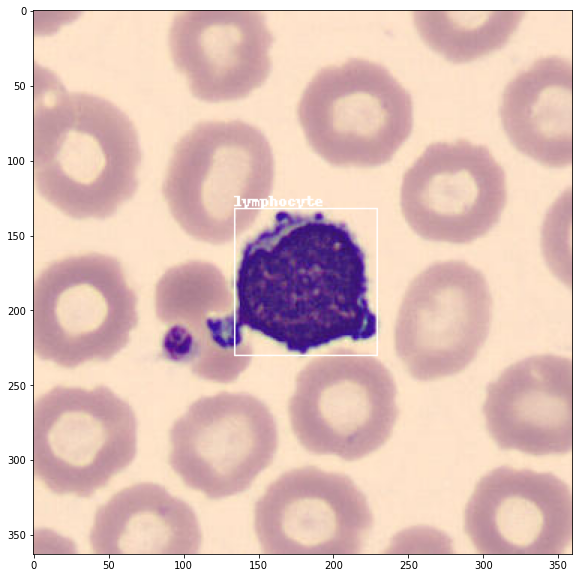

In [55]:
import random
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
random.seed(0)

class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])
    
    plt.imshow(np.array(image))
    plt.show()

# Get any random annotation file 
annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("labels", "images").replace("txt", "jpg")
# assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)
fig = plt.figure(figsize=(12,10))
#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

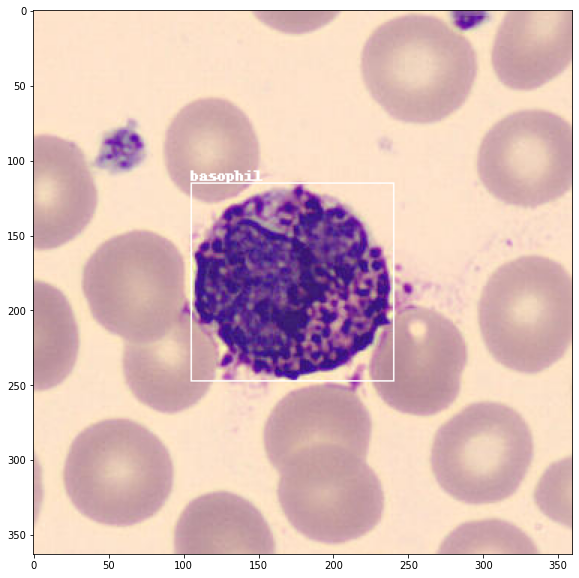

In [57]:
annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("labels", "images").replace("txt", "jpg")
# assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)
fig = plt.figure(figsize=(12,10))
#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

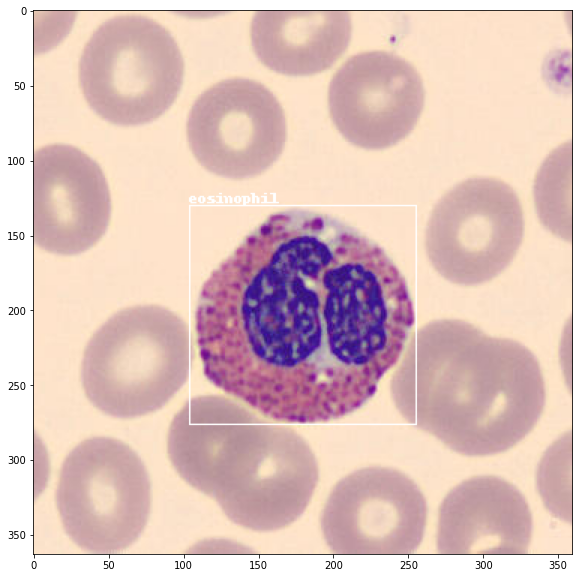

In [58]:
annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("labels", "images").replace("txt", "jpg")
# assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)
fig = plt.figure(figsize=(12,10))
#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

In [ ]:
!pip install wandb
!wandb login

In [11]:
!wandb.init(project="blood_5l", entity="ismail-azdad")

/bin/bash: -c: line 0: syntax error near unexpected token `project="blood_5l",'
/bin/bash: -c: line 0: `wandb.init(project="blood_5l", entity="ismail-azdad")'


<a name='en'></a>
<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Yolo v5 entrainement
        </h1>
    </div>
</div>

In [14]:
# !python train.py --img 640 --cfg yolov5s.yaml  --batch 32 --epochs 100 --data dogs.yaml --weights yolov5s.pt --workers 24 --name dogs
# !python train.py --img 640 --batch 16 --epochs 50 --data dogs.yaml --weights yolov5x.pt --cfg yolov5x.yaml --name dogs  --cache
!python train.py  --hyp hyp.scratch-med.yaml --img 360 --batch 16 --epochs 50 --data blood.yaml --weights yolov5l.pt --cfg yolov5l.yaml --project bloods --name blood --device 0 --cache

wandb: Currently logged in as: ismail-azdad (use `wandb login --relogin` to force relogin)
train: weights=yolov5l.pt, cfg=yolov5l.yaml, data=blood.yaml, hyp=hyp.scratch-med.yaml, epochs=50, batch_size=16, imgsz=360, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=bloods, name=blood, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-169-g1994ad9 torch 1.11.0+cu113 CUDA:0 (Tesla V100-SXM2-16GB, 16160MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.3, cls_pw=1.0, obj=0.7, obj_pw=

In [16]:
!mkdir /content/ShardDrives/MyDrive/bloods/blood_result_5l

In [17]:
!cp -fr /content/yolov5/bloods/blood3/ /content/ShardDrives/MyDrive/bloods/blood_result_5l

In [18]:
!cd /content/yolov5/

In [19]:
!python detect.py --source /content/blood_dataset_yolo/images/test/ --weights /content/yolov5/bloods/blood3/weights/best.pt --conf 0.25 --name bloods

detect: weights=['/content/yolov5/bloods/blood3/weights/best.pt'], source=/content/blood_dataset_yolo/images/test/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=bloods, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-169-g1994ad9 torch 1.11.0+cu113 CUDA:0 (Tesla V100-SXM2-16GB, 16160MiB)

Fusing layers... 
YOLOv5l summary: 367 layers, 46135203 parameters, 0 gradients
image 1/1185 /content/blood_dataset_yolo/images/test/BA_10622.jpg: 640x640 1 basophil, Done. (0.014s)
image 2/1185 /content/blood_dataset_yolo/images/test/BA_111710.jpg: 640x640 1 basophil, Done. (0.015s)
image 3/1185 /content/blood_dataset_yolo/images/test/BA_120278.jpg: 640x640 1 basophil, Done. (0.014s)
image 4/1185 /content/blo

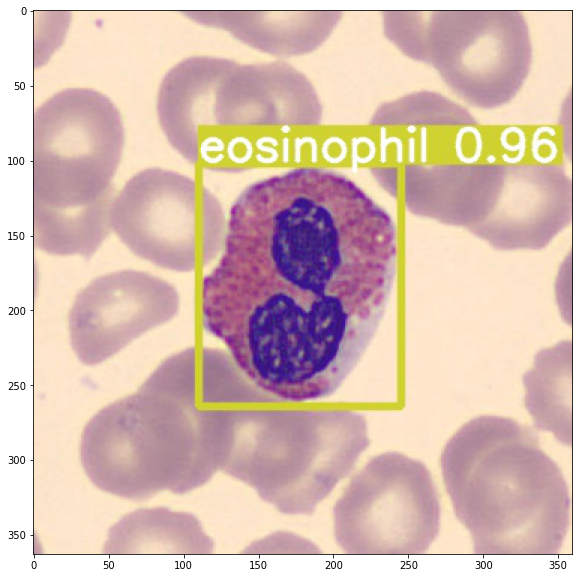

In [23]:
import os
from PIL import Image, ImageDraw
import random
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(12,10))
detections_dir = "runs/detect/bloods/"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

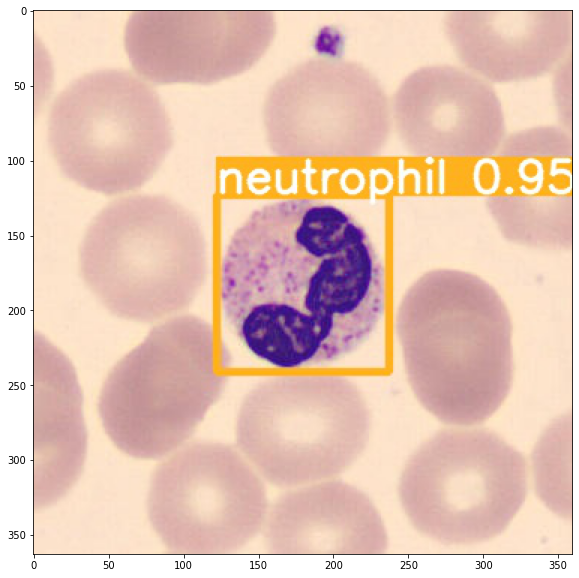

In [28]:
fig = plt.figure(figsize=(12,10))
random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

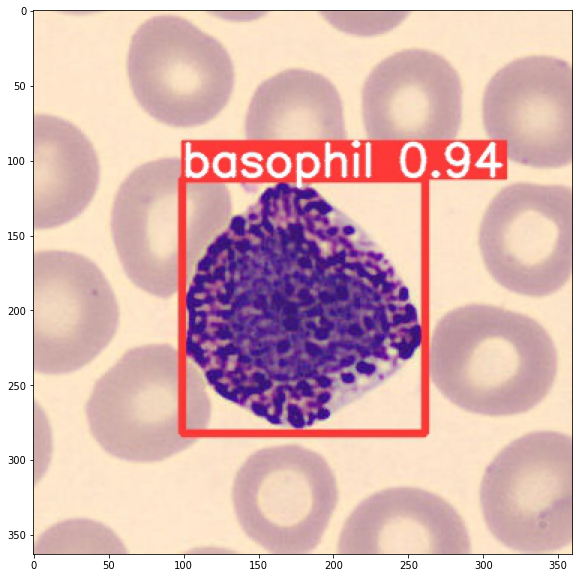

In [58]:
fig = plt.figure(figsize=(12,10))
random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

In [30]:
!pwd

/content/yolov5


<a name='re'></a>
<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Resultat
        </h1>
    </div>
</div>

In [34]:
!python val.py --weights  /content/ShardDrives/MyDrive/bloods/blood_result_5l/blood3/weights/best.pt --data blood.yaml --task test --name blood_test --img 360 --verbose

val: data=/content/yolov5/data/blood.yaml, weights=['/content/ShardDrives/MyDrive/bloods/blood_result_5l/blood3/weights/best.pt'], batch_size=32, imgsz=360, conf_thres=0.001, iou_thres=0.6, task=test, device=, workers=8, single_cls=False, augment=False, verbose=True, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=blood_test, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-169-g1994ad9 torch 1.11.0+cu113 CUDA:0 (Tesla V100-SXM2-16GB, 16160MiB)

Fusing layers... 
YOLOv5l summary: 367 layers, 46135203 parameters, 0 gradients
test: Scanning '/content/blood_dataset_yolo/labels/test' images and labels...1185 found, 0 missing, 0 empty, 0 corrupt: 100% 1185/1185 [00:00<00:00, 9771.49it/s]
test: New cache created: /content/blood_dataset_yolo/labels/test.cache
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 38/38 [00:09<00:00,  4.16it/s]
                 all       1185       1249      0.991      0.989  

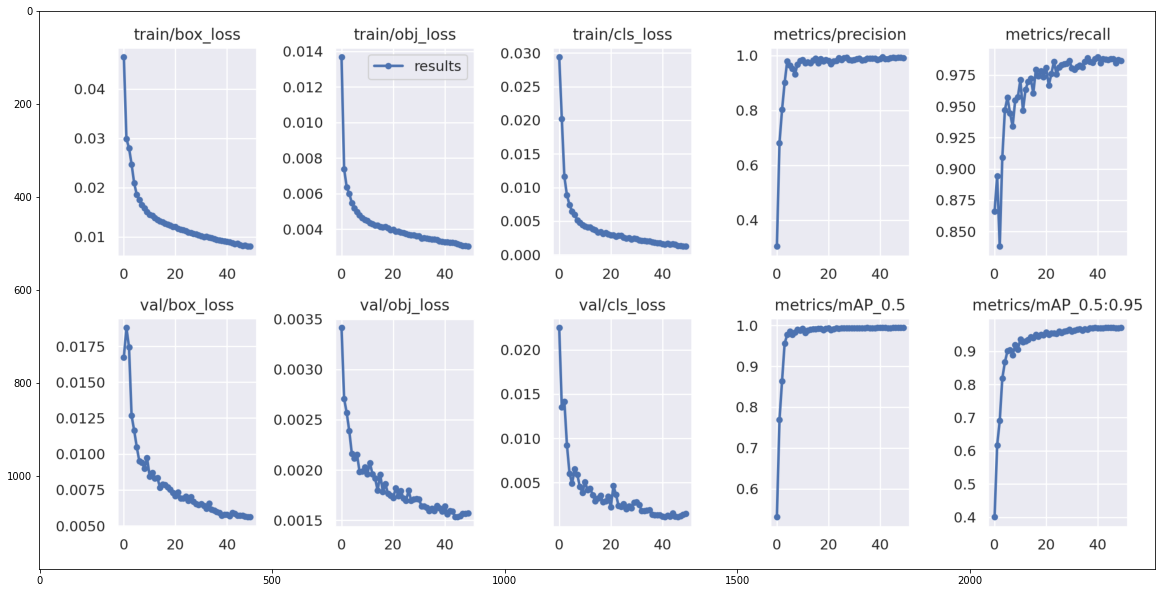

In [35]:
plt.figure(figsize=(20,20)) 
plt.imshow(np.array(Image.open("/content/ShardDrives/MyDrive/bloods/blood_result_5l/blood3/results.png")))

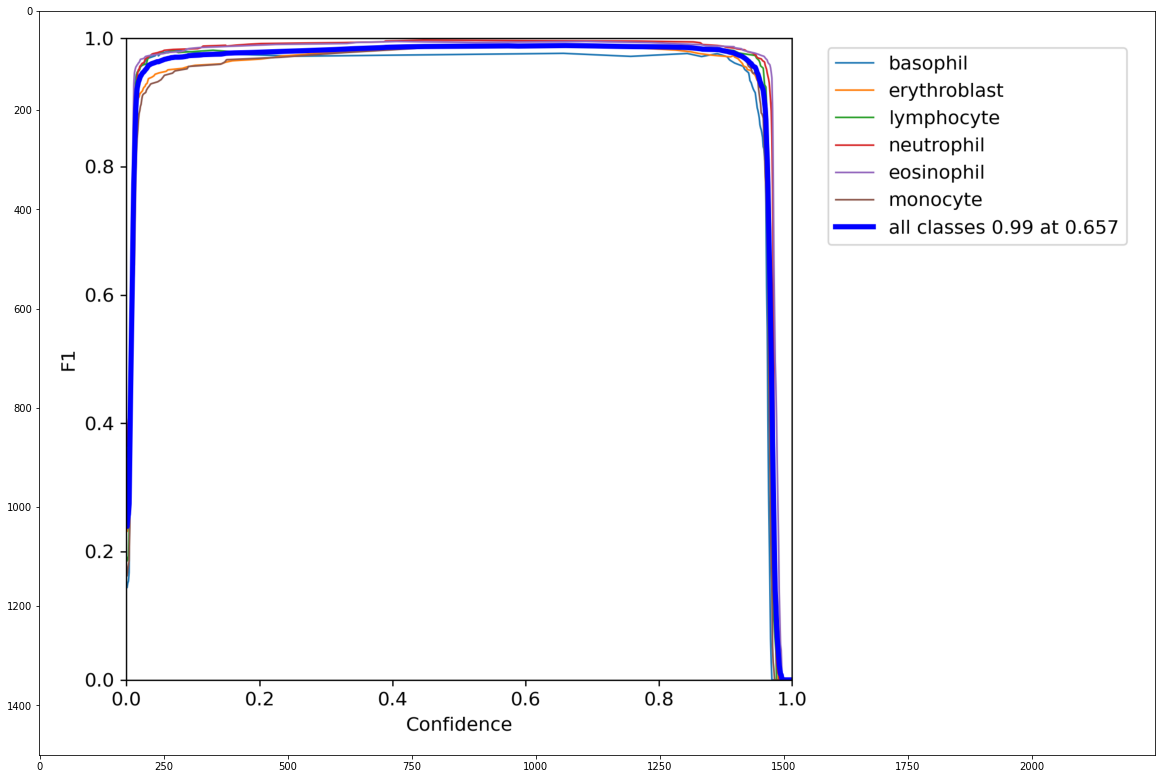

In [36]:
plt.figure(figsize=(20,20)) 
plt.imshow(np.array(Image.open("/content/ShardDrives/MyDrive/bloods/blood_result_5l/blood3/F1_curve.png")))

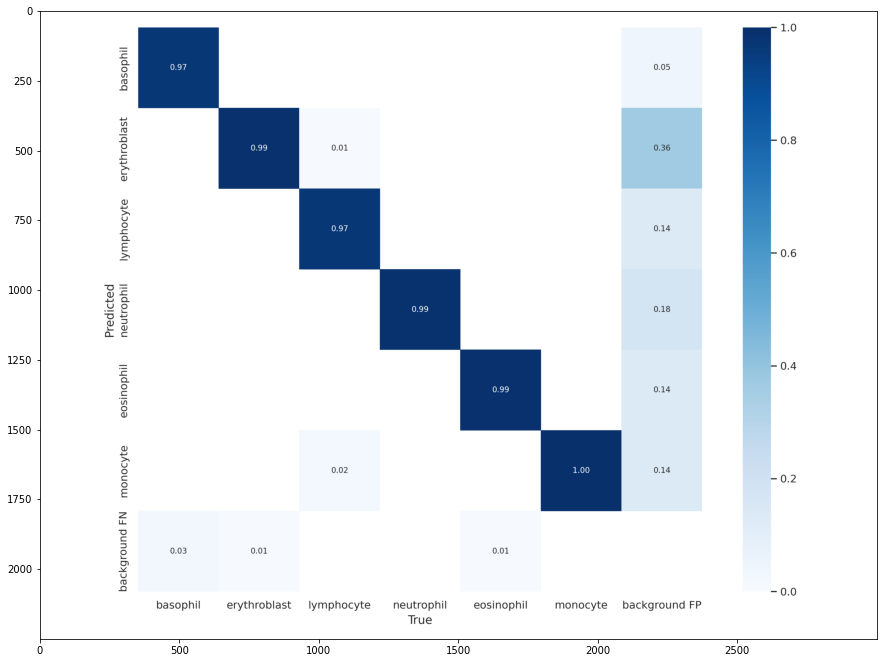

In [37]:
plt.figure(figsize=(15,15)) 
plt.imshow(np.array(Image.open("/content/ShardDrives/MyDrive/bloods/blood_result_5l/blood3/confusion_matrix.png")))

In [ ]:
# !python detect.py --source /content/standford_dogs_dataset/images/test/ --weights /content/ShardDrives/MyDrive/dogs/best.pt --conf 0.25 --name dogs --line-thickness 1

<a name='te'></a>
<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Test du modele
        </h1>
    </div>
</div>

In [39]:
def show_images_from_directory(path, num_sample):
    fig = plt.figure(figsize=(30,50))
    fig.patch.set_facecolor('#377AB7')
    images = os.listdir(path + "/" )[:num_sample]
    for i in range(num_sample):
        img = imgmp.imread(path+"/"+images[i])
        plt.subplot(num_sample/num_sample+1, num_sample, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show() 

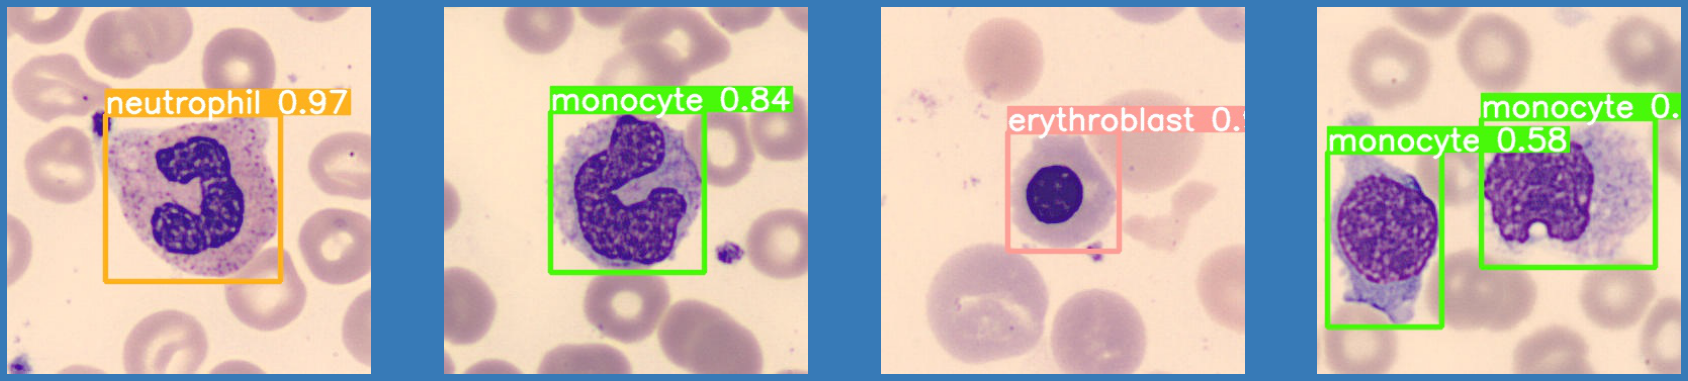

In [44]:
import matplotlib.image as imgmp
import os
show_images_from_directory("/content/yolov5/runs/detect/bloods", 4)

In [45]:
import os
from PIL import Image, ImageDraw
import random
import numpy as np
import matplotlib.pyplot as plt
detections_dir = "/content/yolov5/runs/detect/bloods"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

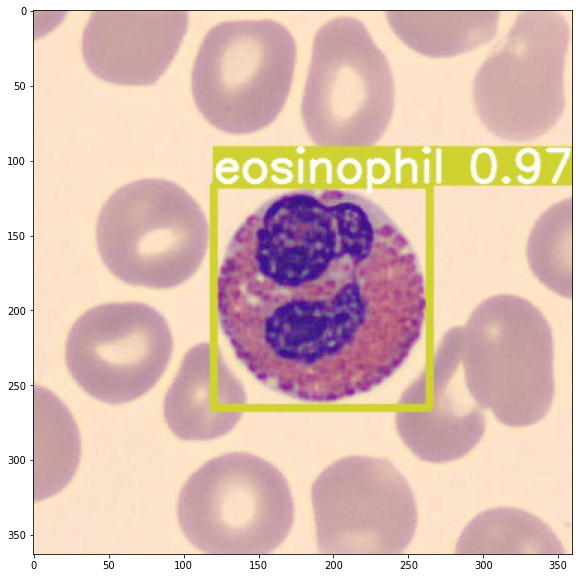

In [47]:
plt.figure(figsize=(10,10))
random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

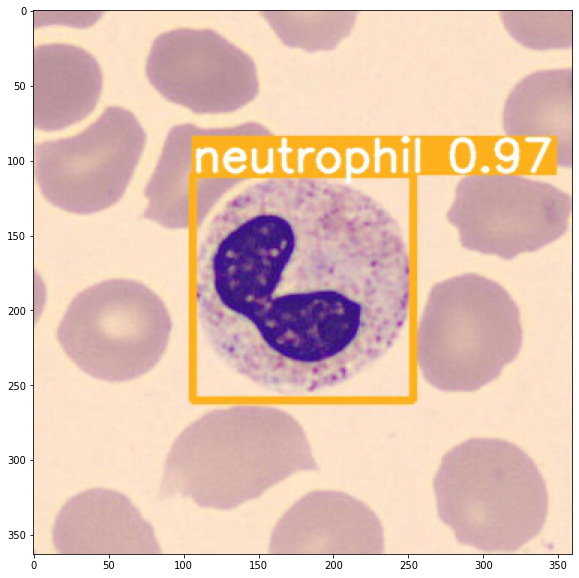

In [50]:
plt.figure(figsize=(10,10))
random.seed(10)
random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

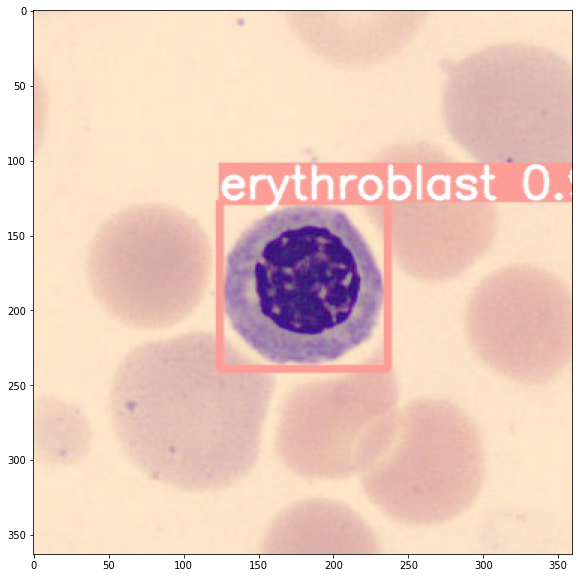

In [53]:
plt.figure(figsize=(10,10))
random.seed(520)
random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

In [38]:
import pandas as pd
results = pd.read_csv("/content/ShardDrives/MyDrive/bloods/blood_result_5l/blood3/results.csv",skipinitialspace=True)
results

epoch  train/box_loss  train/obj_loss  train/cls_loss  metrics/precision  \
0       0        0.046494        0.013674        0.029400            0.30451   
1       1        0.029883        0.007385        0.020239            0.68157   
2       2        0.028039        0.006371        0.011609            0.80243   
3       3        0.024740        0.005998        0.008841            0.90055   
4       4        0.020893        0.005478        0.007415            0.97937   
5       5        0.018590        0.005187        0.006471            0.96441   
6       6        0.017529        0.004968        0.005972            0.95249   
7       7        0.016463        0.004789        0.005132            0.93130   
8       8        0.015857        0.004634        0.004792            0.96783   
9       9        0.015075        0.004539        0.004431            0.98038   
10     10        0.014542        0.004474        0.004267            0.98456   
11     11        0.014333        0.004359        0.004078            0.97247   
12     12        0.013830        0.004304        0.004064            0.97518   
13     13        0.013500        0.004212        0.003793            0.97291   
14     14        0.013220        0.004223        0.003669            0.98255   
15     15        0.012973        0.004143        0.003305            0.98850   
16     16        0.012720        0.004124        0.003389            0.97162   
17     17        0.012505        0.004145        0.003111            0.98702   
18     18        0.012319        0.004047        0.003255            0.97892   
19     19        0.012017        0.003961        0.003061            0.98318   
20     20        0.012097        0.003991        0.002930            0.98003   
21     21        0.011685        0.003871        0.002915            0.96845   
22     22        0.011521        0.003880        0.002719            0.97825   
23     23        0.011362        0.003836        0.002840            0.98044   
24     24        0.011237        0.003790        0.002830            0.99102   
25     25        0.010948        0.003745        0.002567            0.98430   
26     26        0.010825        0.003701        0.002441            0.99088   
27     27        0.010608        0.003672        0.002522            0.99234   
28     28        0.010539        0.003669        0.002306            0.98385   
29     29        0.010363        0.003605        0.002401            0.98200   
30     30        0.010212        0.003611        0.002387            0.98440   
31     31        0.009958        0.003496        0.002144            0.98708   
32     32        0.010046        0.003508        0.002079            0.98917   
33     33        0.009927        0.003475        0.002099            0.98207   
34     34        0.009781        0.003455        0.002006            0.98475   
35     35        0.009622        0.003440        0.002000            0.98958   
36     36        0.009441        0.003429        0.001850            0.98901   
37     37        0.009367        0.003403        0.001832            0.98939   
38     38        0.009233        0.003338        0.001755            0.98840   
39     39        0.009105        0.003292        0.001754            0.98336   
40     40        0.008994        0.003288        0.001597            0.98706   
41     41        0.008898        0.003268        0.001543            0.99408   
42     42        0.008776        0.003249        0.001646            0.98794   
43     43        0.008598        0.003259        0.001525            0.98703   
44     44        0.008648        0.003234        0.001595            0.99074   
45     45        0.008388        0.003178        0.001506            0.99283   
46     46        0.008221        0.003119        0.001336            0.99098   
47     47        0.008238        0.003063        0.001301            0.99220   
48     48        0.008084        0.003073        0.001242            0.99172   
49  

In [54]:
results.columns

Index(['epoch', 'train/box_loss', 'train/obj_loss', 'train/cls_loss',
       'metrics/precision', 'metrics/recall', 'metrics/mAP_0.5',
       'metrics/mAP_0.5:0.95', 'val/box_loss', 'val/obj_loss', 'val/cls_loss',
       'x/lr0', 'x/lr1', 'x/lr2'],
      dtype='object')

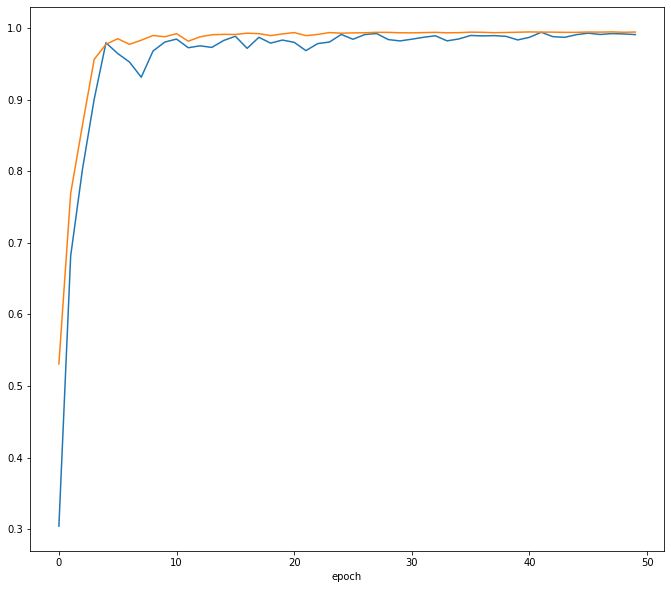

In [55]:
fig = plt.figure(figsize=(25,10))
# summarize history for accuracy
plt.subplot(1, 2, 1)
# plt.plot(results['train/box_loss'])
# plt.plot(results['train/obj_loss'])
# plt.plot(results[ 'train/cls_loss'])
plt.plot(results[ 'metrics/precision'])
# plt.plot(results['metrics/recall'])
plt.plot(results[ 'metrics/mAP_0.5'])
# plt.plot(results['metrics/mAP_0.5:0.95'])
# plt.plot(results['val/box_loss'])
# plt.plot(results['val/obj_loss'])
# plt.plot(results['val/cls_loss'])
# plt.plot(results['x/lr0'])
# plt.plot(results['x/lr1'])
# plt.plot(results[ 'x/lr2'])

# plt.title(modele_name+' '+ first_score, fontsize=18)
# plt.ylabel(first_score)
plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# # summarize history for loss
# plt.subplot(1, 2, 2)
# plt.plot(dict_history[second_score])
# plt.plot(dict_history['val_' + second_score],
#           linestyle='--', color="red")
# plt.title(modele_name +' '+ second_score, fontsize=18)
# plt.ylabel(second_score)
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
plt.show()